In [1]:
""" sheet1_implementation.py

PUT YOUR NAME HERE:
Boris Bubla
Leonard Paeleke


Write the functions
- pca
- gammaidx
- lle
Write your implementations in the given functions stubs!


(c) Daniel Bartz, TU Berlin, 2013
"""


' sheet1_implementation.py\n\nPUT YOUR NAME HERE:\nBoris Bubla\nLeonard Paeleke\n\n\nWrite the functions\n- pca\n- gammaidx\n- lle\nWrite your implementations in the given functions stubs!\n\n\n(c) Daniel Bartz, TU Berlin, 2013\n'

In [684]:
import os
import numpy as np
import scipy.linalg as la
import scipy.spatial as sp
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [712]:
X = np.array([[ -2.133268233289599,   0.903819474847349,   2.217823388231679, -0.444779660856219,
                -0.661480010318842,  -0.163814281248453,  -0.608167714051449,  0.949391996219125],
            [ -1.273486742804804,  -1.270450725314960,  -2.873297536940942,   1.819616794091556,
              -2.617784834189455,   1.706200163080549,   0.196983250752276,   0.501491995499840],
            [ -0.935406638147949,   0.298594472836292,   1.520579082270122,  -1.390457671168661,
              -1.180253547776717,  -0.194988736923602,  -0.645052874385757,  -1.400566775105519]]).T
m = 2;

In [721]:
class PCA():
    """
        Definition of PCA Class
        Algorithms in guide.pdf used, pg 15-17
    """
    def __init__(self, Xtrain):
        """
            Compute Principal Components
        """
        # 1. centre data
        self.Xmean = np.mean(Xtrain, axis = 0)
        self.C = Xtrain - self.Xmean
        # 2. generate covariance marix
        self.C = np.cov(self.C.T)
        # 3. calculate eigenvalues and eigenvectors
        self.D, self.U = np.linalg.eig(self.C)
        # Make a list of (eigenvalue, eigenvector) tuples
        self.pairs = [(np.abs(self.D[i]), self.U[i]) for i in range(len(self.D))]
        # Sort the (eigenvalue, eigenvector) tuples from high to low
        self.pairs.sort(key = lambda x:x[0])
        self.pairs.reverse()
        
        self.U = -1*np.array([self.pairs[i][1] for i in range(len(self.pairs))]) # eigencevtors CAVEAT: mulitplying by -1 because numpy.eig routine delivers wrong sign
        self.D = np.array([self.pairs[i][0] for i in range(len(self.pairs))]) # eigenvalues
    def project(self, Xtest, m):
        """
            Projecting to the low-dimensional sub-space
        """
        # 1. centre data by mean of training
        Xtest = Xtest - self.Xmean
        # 2. project data to m principal components
        Z = self.U.T[range(m)].dot(Xtest.T).T    
        return Z
    def denoise(self, Xtest, m):
        """
            Reconstructing projected data points in the original space
        """
        # 1. projection to the low-dimencsional sub-space
        Z = self.project(Xtest, m)
        # 2. recontraction by m dimensions
        Y = Z.dot(self.U.T[range(m)])+self.Xmean
        return Y

In [713]:
pca1 = PCA(X)

In [718]:
X.shape

(8, 3)

In [6]:
Z = pca1.project(X,m)
Z

array([[-0.26424835,  2.25344912],
       [ 1.29695602, -0.60127941],
       [ 3.59711235, -1.28967825],
       [-2.45930604, -0.45229125],
       [ 1.33335186,  1.82830153],
       [-1.82020954, -1.04090645],
       [-0.85747383,  0.21347615],
       [-0.82618248, -0.91107143]])

In [7]:
Y = pca1.denoise(X,m)
Y

array([[-1.88406616, -1.35842791, -1.38087939],
       [ 0.96048487, -1.28976527,  0.19729962],
       [ 2.34965134, -2.91823143,  1.28492391],
       [-0.53132686,  1.84911663, -1.23574621],
       [-0.96141012, -2.51555289, -0.64409954],
       [ 0.17114282,  1.59202918, -0.79375686],
       [-0.47605492,  0.15195227, -0.88121723],
       [ 0.43110399,  0.67815178, -0.47407698]])

In [65]:
X = np.array([  [   0.5376671395461, -2.25884686100365, 0.318765239858981, -0.433592022305684, 3.57839693972576,
                    -1.34988694015652, 0.725404224946106, 0.714742903826096, -0.124144348216312, 1.40903448980048,
                    0.67149713360808, 0.717238651328838, 0.488893770311789, 0.726885133383238, 0.293871467096658,
                    0.888395631757642, -1.06887045816803, -2.9442841619949, 0.325190539456198, 1.37029854009523],
                [   1.83388501459509, 0.862173320368121, -1.30768829630527, 0.34262446653865, 2.76943702988488,
                    3.03492346633185, -0.0630548731896562, -0.204966058299775, 1.48969760778546, 1.41719241342961,
                    -1.20748692268504, 1.63023528916473, 1.03469300991786, -0.303440924786016, -0.787282803758638,
                    -1.14707010696915, -0.809498694424876, 1.4383802928151, -0.754928319169703, -1.7115164188537]]).T

k = 3

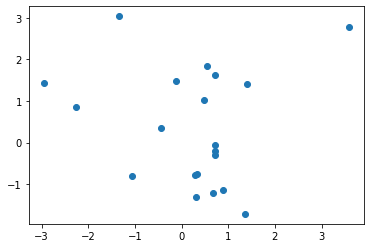

In [9]:
plt.plot(X.T[0],X.T[1], 'o')

In [66]:
z = np.array([complex(c[0], c[1]) for c in X])
m, n = np.meshgrid(z, z)
# get the distance via the norm
D = abs(m-n)
D

array([[0.        , 2.960526  , 3.14919052, 1.77966356, 3.18139832,
        2.2372648 , 1.90620727, 2.04652621, 0.74596207, 0.96587462,
        3.04431499, 0.27151269, 0.8006789 , 2.14568535, 2.63248116,
        3.00151694, 3.09328959, 3.50434143, 2.5975182 , 3.64186029],
       [2.960526  , 0.        , 3.36932984, 1.89775821, 6.14093397,
        2.3552179 , 3.12438822, 3.15927564, 2.22502619, 3.70963607,
        3.58753529, 3.07359792, 2.75315122, 3.20519143, 3.03925589,
        3.73392481, 2.05195789, 0.8954545 , 3.048322  , 4.44910949],
       [3.14919052, 3.36932984, 0.        , 1.81371819, 5.21997603,
        4.65216907, 1.30937681, 1.1716632 , 2.83223177, 2.93490407,
        0.36668802, 2.96482311, 2.34855145, 1.08400859, 0.52100055,
        0.59184203, 1.47435603, 4.26478418, 0.55279732, 1.12640998],
       [1.77966356, 1.89775821, 1.81371819, 0.        , 4.6888671 ,
        2.84395328, 1.22794464, 1.27221401, 1.18808024, 2.13306557,
        1.90369834, 1.72694901, 1.15322977, 1

In [103]:
D = sp.distance_matrix(X, X)

In [104]:
D

array([[0.        , 2.960526  , 3.14919052, 1.77966356, 3.18139832,
        2.2372648 , 1.90620727, 2.04652621, 0.74596207, 0.96587462,
        3.04431499, 0.27151269, 0.8006789 , 2.14568535, 2.63248116,
        3.00151694, 3.09328959, 3.50434143, 2.5975182 , 3.64186029],
       [2.960526  , 0.        , 3.36932984, 1.89775821, 6.14093397,
        2.3552179 , 3.12438822, 3.15927564, 2.22502619, 3.70963607,
        3.58753529, 3.07359792, 2.75315122, 3.20519143, 3.03925589,
        3.73392481, 2.05195789, 0.8954545 , 3.048322  , 4.44910949],
       [3.14919052, 3.36932984, 0.        , 1.81371819, 5.21997603,
        4.65216907, 1.30937681, 1.1716632 , 2.83223177, 2.93490407,
        0.36668802, 2.96482311, 2.34855145, 1.08400859, 0.52100055,
        0.59184203, 1.47435603, 4.26478418, 0.55279732, 1.12640998],
       [1.77966356, 1.89775821, 1.81371819, 0.        , 4.6888671 ,
        2.84395328, 1.22794464, 1.27221401, 1.18808024, 2.13306557,
        1.90369834, 1.72694901, 1.15322977, 1

In [53]:
D[:,Y[:,1:k+1]].shape

(20, 20, 3)

In [109]:
D = sp.distance_matrix(X, X)
    #pairs = [list(zip(np.linspace(0,len(X)-1,len(X)), D[i])) for i in range(len(X))]
    # Sort distance matrix
kn = np.argsort(D,kind='mergesort')

In [110]:
kn = kn[:,1:k+1]
kn

array([[11,  8, 12],
       [17,  3, 16],
       [10, 14, 18],
       [12,  8,  6],
       [ 9, 11,  0],
       [ 8,  0, 17],
       [ 7, 13, 18],
       [13,  6, 18],
       [ 0, 12, 11],
       [11,  0, 12],
       [15,  2, 14],
       [ 0, 12,  9],
       [11,  8,  0],
       [ 7,  6, 18],
       [18,  2, 10],
       [10,  2, 18],
       [ 3, 14, 18],
       [ 1,  5,  3],
       [14,  2, 10],
       [15, 10,  2]])

In [111]:
np.sum(np.take_along_axis(D, kn, axis = 1),axis = 1)/k

array([0.60605122, 1.61505687, 0.48016196, 1.18975155, 2.9391052 ,
       2.15531725, 0.39399627, 0.30516081, 0.78748142, 0.89540255,
       0.38559917, 0.5443959 , 0.73397995, 0.31464285, 0.37699473,
       0.50109139, 1.35790455, 1.96372676, 0.38922825, 0.9100659 ])

In [67]:
def gammaidx(X, k):
    """
    Gamma identification for outlier detection by ranking
    """
    y = []
    # Calculate distance matrix
    D = sp.distance_matrix(X, X)
    z = np.array([complex(c[0], c[1]) for c in X])
    m, n = np.meshgrid(z, z)
    # get the distance via the norm
    D = np.linalg.norm(m-n)
    # Sort distance matrix
    kn = np.argsort(D,kind='mergesort')
    # identify k-nearest neighbours
    kn = kn[:,1:k+1]
    # sum over k-neaest neighbours and divide bei k
    y = np.sum(np.take_along_axis(D, kn, axis = 1),axis = 1)/k
    
    return y

In [68]:
y = gammaidx(X, k)

In [69]:
y

array([0.60605122, 1.61505687, 0.48016196, 1.18975155, 2.9391052 ,
       2.15531725, 0.39399627, 0.30516081, 0.78748142, 0.89540255,
       0.38559917, 0.5443959 , 0.73397995, 0.31464285, 0.37699473,
       0.50109139, 1.35790455, 1.96372676, 0.38922825, 0.9100659 ])

In [25]:
correct_gamma = np.array([ 0.606051220224367, 1.61505686776722, 0.480161964450438, 1.18975154873627,
                                    2.93910520141032, 2.15531724762712, 0.393996268071324, 0.30516080506303,
                                    0.787481421847747, 0.895402545799062, 0.385599174039363, 0.544395897115756,
                                    0.73397995201338, 0.314642851266896, 0.376994725474732, 0.501091387197748,
                                    1.3579045507961, 1.96372676400505, 0.389228251829715, 0.910065898315003])

In [13]:
pos_label = 1
y_true = test1_y_true
y_pred = test1_y_pred

In [7]:
def auc(y_true,y_pred,plot=False):
    #1. FIND ROC CURVE POINTS & FPR/TPR
    pos_label=1
    y_true=(y_true==pos_label) #boolean vec of true labels

    #arrange predictions in descending order (indexes)
    descending_scores=np.argsort(y_pred,kind='mergesort')[::-1]
    #ascending_scores=np.argsort(y_pred,kind='mergesort')[::1]
    y_pred=y_pred[descending_scores]
    y_true=y_true[descending_scores]

    #determine distinct values to create an index of decreasing values
    #'predicted value in y_pred where lower values tend to correspond to label -1 and higher values to label +1'
    distinct_values_idx=np.where(np.diff(y_pred))[0]#length n-1 as calculating differences
    distinct_descending_scores_idx=np.r_[distinct_values_idx,y_true.size-1]# add last entry

    tps=np.cumsum(y_true)[distinct_descending_scores_idx]#cumulative sum of true positives using idx
    fps=1-tps+distinct_descending_scores_idx #same as cum sum of false positives

    #add 0,0 position for ROC curve
    tps=np.r_[0,tps]
    fps=np.r_[0,fps]

    #false/true positive rate
    fpr=fps/fps[-1] #rate=sum/max
    tpr=tps/tps[-1]
    
    #2.PLOT ROC CURVE POINTS
    if plot==True:
        plt.plot(fpr,tpr,label='Algorithm')
        plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),label='Random guesses')
        plt.ylabel('True Positive Rate (TPR)')
        plt.xlabel('False Positive Rate (FPR)')
        plt.title('ROC Curve')
        plt.legend()

    #3. CALCULATE AUC
    #reshape needed
    fpr=fpr.reshape(1,fpr.shape[0])
    tpr=tpr.reshape(1,tpr.shape[0])
    
    #assume positive area
    end=1
    #check if negative area (good discrimination, just switch labels)
    diff_fpr=np.diff(fpr)
    if np.all(diff_fpr<=0):
        end=-1
    #calculate area using trapezoidal approach
    area=end*np.trapz(tpr,fpr)

    return area

In [6]:
test1_y_true=np.array([-1, -1, -1, +1, +1])
test1_y_pred=np.array([0.3, 0.4, 0.5, 0.6, 0.7])#ans=1.0
test2_y_true=np.array([-1, -1, -1, +1, +1, +1])
test2_y_pred=np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8])#ans=0.89
test3_y_true=np.array([+1, -1, -1, +1, +1, -1])
test3_y_pred=np.array([0.3, 0.4, 0.6, 0.5, 0.7, 0.8])#ans=1/3

array([1.])

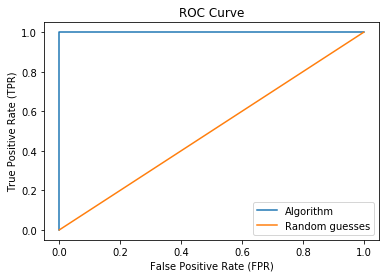

In [30]:
auc(test1_y_true,test1_y_pred,plot=True)

array([0.88888889])

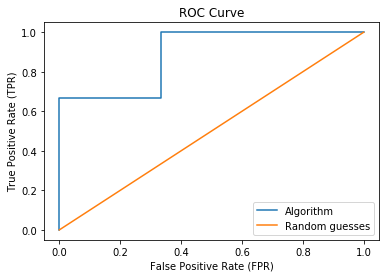

In [31]:
auc(test2_y_true,test2_y_pred,plot=True)

In [32]:
auc(test3_y_true,test3_y_pred,plot=False)

array([0.33333333])

In [648]:
def lle(X, m, tol, n_rule, k=None, epsilon=None):
    """
        Locally Linear Embedding
    """
    
    # compute neighborhoord by kNN or eps-bole rule
    
    # 1. calculate euclidean distance of data
    D = sp.distance_matrix(X, X)
    
    # 2. check for applied rule
    if n_rule == 'knn':
        # check if k is provided
        assert (k != None), """The parameter 'k' is required for the 'knn' rule"""
        # 3a. calculate k nearest neighbors
        # Sort distance matrix
        kn = np.argsort(D,kind='mergesort')
        # identify k-nearest neighbors
        kn = kn[:,1:k+1]
        
    elif n_rule == 'eps-ball':
        # check if epsilon is provided
        assert (epsilon != None), """The parameter 'epsilon' is required for the 'eps-ball' rule"""
        # 3b. compare distance by epsilon
        # tupel (1. element, 2. element)
        idx = np.argwhere(D<epsilon) #CHECK
        # row wise all points in the neighborhood
        kn = [idx[:,1][idx[:,0]==i] for i in np.unique(idx[:,0])]
    else:
        print("""The following rule {} is not known. Please use either 'knn' or 'eps-ball'.""".format(n_rule))
    
    # 4. calculate reconstruction weights 
    # intialize weight matrix
    W = np.zeros((len(X),len(X)))
    # calculate weights for every point
    for i in range(len(X)):
        # calculate covariance matrix
        C = np.cov(X[kn[i]])
        # solve for weights 
        I = np.eye(len(X[kn[i]]))
        weights = np.linalg.inv(C-3*I).dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1))
        # normalize weights
        weights = (1/(weights.T.dot(np.ones(len(X[kn[i]])).reshape(len(X[kn[i]]),1)))*weights).reshape(len(X[kn[i]]))
        W[i,kn[i]] = weights
    
    # 5. calculate cost matrix
    I = np.eye(len(X))
    M = (I - W).T@(I-W)
    
    # 6. Obtain eigenvalues and eigenvector of M
    eigen_values, eigen_vector = np.linalg.eig(M)
    # sort eigenvalues in ascending order
    eigen_kn = np.argsort(abs(eigen_values),kind='mergesort').reshape(len(X),1)
    # sort eigenvectors by eigenvalues, eigenvector along columns, first eigenvector -> [:,0]
    V = -1*np.take_along_axis(eigen_vector.T, eigen_kn, axis = 0).T # CAVEAT: mulitplying by -1 because numpy.eig routine delivers wrong sign
    
    # 7. embedded dimension 
    Y = V[:,1:m+1]
    
    #8. Check connected graph
    if (connected_components(V,directed=False)[0]!=1):
        raise ValueError('Graphs are not connected!')
    
    return Y

In [680]:
V = lle(X,5,0.05,'eps-ball',epsilon = 3)

In [681]:
V.shape

(500, 5)

In [682]:
V

array([[ 1.28962417e-01,  7.28554888e-02,  2.00914471e-02,
         1.43531644e-01,  7.06207733e-02],
       [-9.81346956e-03,  3.37816024e-03, -6.73688337e-02,
         1.94501152e-02,  6.07737451e-03],
       [ 4.03745017e-02, -3.01612695e-02, -6.84006354e-02,
        -4.84089482e-03,  1.03704946e-02],
       ...,
       [ 1.33520601e-02, -9.17862374e-03,  7.01616962e-03,
        -4.22444836e-03, -5.98989146e-03],
       [-1.31070463e-02, -2.95608772e-02, -3.61561346e-02,
         1.54710138e-02, -6.53557598e-02],
       [ 4.95130484e-03,  1.30161773e-03, -3.43414478e-03,
        -2.40359193e-05, -1.48596022e-02]])

In [631]:
kn = np.argsort(abs(eigen_values),kind='mergesort').reshape(len(X),1)
# identify k-nearest neighbours
#kn = kn[:,1:k+1]
# sum over k-neaest neighbours and divide bei k
y = np.take_along_axis(eigen_vector.T, kn, axis = 0).T

In [32]:
# Test set for lle
def randrot(d):
    '''generate random orthogonal matrix'''
    M = 100. * (np.random.rand(d, d) - 0.5)
    M = 0.5 * (M - M.T);
    R = expm(M);
    return R

def test_lle():
    n = 500
    Xt = 10. * np.random.rand(n, 2);
    X = np.append(Xt, 0.5 * np.random.randn(n, 8), 1);

    # Rotate data randomly.
    X = np.dot(X, randrot(10).T)
    return X

### 1. Excercise

In [701]:
import scipy.io as sio


In [696]:
# Load data
cwd = os.getcwd()
file_name = 'usps.mat'
path_to_data = cwd + '/data/'+file_name
assert os.path.exists(path_to_data), "The path does not excist."
with open(gt_txt["path_to_data_folder"]+ "/" + gt_txt["gt_txt_file"], newline='') as csvfile:
        gt_reader = csv.reader(csvfile, delimiter = ";")

In [702]:
data = sio.loadmat(path_to_data)

In [704]:
data_labels = data['data_labels']
data_patterns = data['data_patterns']

In [717]:
data_patterns.T.shape

(2007, 256)

In [722]:
pca = PCA(data_patterns)

In [723]:
pca.pairs

[(238.2077955012859,
  array([ 0.02256811+0.j,  0.01066517+0.j, -0.04626952+0.j, ...,
          0.00187525+0.j, -0.00320775+0.j,  0.02076811+0.j])),
 (96.80312677535633,
  array([ 6.36247368e-03+0.j, -1.76995194e-02+0.j,  2.95471964e-03+0.j, ...,
          6.38610232e-04+0.j, -3.53625371e-05+0.j,  1.55136775e-03+0.j])),
 (57.745191644709784,
  array([ 0.02093339+0.j, -0.00340608+0.j, -0.03047786+0.j, ...,
         -0.00012793+0.j,  0.00015713+0.j,  0.00065413+0.j])),
 (39.58392842053702,
  array([ 0.00399592+0.j, -0.015844  +0.j,  0.00137802+0.j, ...,
          0.00115737+0.j, -0.00179269+0.j,  0.00125931+0.j])),
 (32.88275391079241,
  array([ 1.04275755e-02+0.j, -2.53768968e-02+0.j,  2.18758574e-02+0.j, ...,
         -4.08000124e-04+0.j, -3.73763388e-05+0.j,  9.23640653e-05+0.j])),
 (25.981268595725812,
  array([ 0.01665621+0.j, -0.05087221+0.j,  0.00715058+0.j, ...,
          0.00185984+0.j,  0.00096435+0.j, -0.00231564+0.j])),
 (19.400991444651037,
  array([ 0.02952818+0.j, -0.03757

In [ ]:
#ASSIGNMENT 6

In [ ]:
#using old gammaidx function since it's stable -- the norm version threw an error.
def gammaidx(X, k):
    """
    Gamma identification for outlier detection by ranking
    """
    y = []
    # Calculate distance matrix
    D = sp.distance_matrix(X, X)
    # Sort distance matrix
    kn = np.argsort(D,kind='mergesort')
    # identify k-nearest neighbours
    kn = kn[:,1:k+1]
    # sum over k-neaest neighbours and divide bei k
    y = np.sum(np.take_along_axis(D, kn, axis = 1),axis = 1)/k
    
    return y

In [ ]:
#load and unpack data
data = np.load('banana.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])

In [ ]:
#data manipulation and preprocessing
outlier_rate=np.array([0.01,0.1,0.5,1])
pos_idx=np.argwhere(data['label']==1).T[1]#idx of pos class
n_outliers=np.round(outlier_rate*len(pos_idx))
pos_data=data['data'].T[pos_idx]
n_outliers=n_outliers.astype(int)

In [ ]:
#This takes about 25min to run --- inefficient but gets the job done.
loops=50

results_3=np.empty((loops,len(n_outliers)))
results_10=np.empty((loops,len(n_outliers)))
results_mean=np.empty((loops,len(n_outliers)))

for i in range(loops):
    
    
    for j in n_outliers:
        
        #draw outliers from uniform box
        outliers=np.random.uniform(low=-4,high=4,size=(j,2))
        print(outliers[0][0])
        
        #reset data
        data_=data['data'].T
        labels_=data['label'].T
        #print(data_.shape)
        #print(labels_.shape)
        
        #add outliers to positive class
        data_=np.append(data_,outliers,axis=0)
        labels_=np.append(labels_,np.ones((j,1)),axis=0)
        
        #print(data_.shape)
        #print(labels_.shape)
        
        #compute gamma 3,10,mean
        gamma_3=gammaidx(data_,3)
        gamma_10=gammaidx(data_,10)
        #compute dist_to_mean
        diff=np.subtract(data_,np.mean(data_,axis=0))
        dist_to_mean=np.linalg.norm(diff,axis=1)
        
        #print("gamma_3",gamma_3)
        #print("gamma10",gamma_10)
        #print("dist_to_mean",dist_to_mean)
        
        #compute auc
        auc_3=auc(labels_,gamma_3)
        auc_10=auc(labels_,gamma_10)
        auc_mean=auc(labels_,dist_to_mean)
        
        #print("auc 3",auc_3)
        #print("auc 10",auc_10)
        #print("auc mean",auc_mean)
        
        #store results
        results_3[i][np.argwhere(n_outliers==j)]=auc_3[0]
        results_10[i][np.argwhere(n_outliers==j)]=auc_10[0]
        results_mean[i][np.argwhere(n_outliers==j)]=auc_mean[0]
        
        
        

In [ ]:
#plot the results
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel('Percentage of outliers added relative to positive class (%)')
ax.set_ylabel('AUC Score')
bp1=ax.boxplot(results_10,patch_artist=True,boxprops=dict(facecolor='green', color='green'))
bp2=ax.boxplot(results_3,patch_artist=True,boxprops=dict(facecolor='red', color='red'))
bp3=ax.boxplot(results_mean,patch_artist=True,boxprops=dict(facecolor='blue', color='blue'))
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['1', '10', '50', '100'], fontsize=12)
ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['$\gamma$-index with k=10', '$\gamma$-index with k=3','Distance to mean'], loc='upper left')


In [ ]:
#exemplary run
n_outliers=np.array([1188])#50% contamination

#draw outliers from uniform box
outliers=np.random.uniform(low=-4,high=4,size=(n_outliers[0],2))
        
#pos data
pos=data['data'].T
        
#add outliers to positive class
data_=np.append(pos,outliers,axis=0)
        
#compute gamma 3,10,mean
gamma_3=gammaidx(data_,3)
gamma_10=gammaidx(data_,10)
#compute dist_to_mean
diff=np.subtract(data_,np.mean(data_,axis=0))
dist_to_mean=np.linalg.norm(diff,axis=1)

In [ ]:
#exemplary plots
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,6))
fig.suptitle('Marker sizes have been scaled by outlier scores and an additional factor of 100 for the two using the $\gamma$ indexes and 10 for the distance to mean', fontsize=12)

axes[0].scatter(x=pos.T[0],y=pos.T[1],s=gamma_3[:5300]*100,c='r',label='data',alpha=0.3,edgecolors=None,)
axes[0].scatter(x=outliers.T[0],y=outliers.T[1],s=gamma_3[5300:]*100,c='b',label='outliers',alpha=0.3,edgecolors=None)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('$\gamma$-index with k=3')
axes[0].legend()

axes[1].scatter(x=pos.T[0],y=pos.T[1],s=gamma_10[:5300]*100,c='r',label='data',alpha=0.3,edgecolors=None,)
axes[1].scatter(x=outliers.T[0],y=outliers.T[1],s=gamma_10[5300:]*100,c='b',label='outliers',alpha=0.3,edgecolors=None)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('$\gamma$-index with k=10')
axes[1].legend()

axes[2].scatter(x=pos.T[0],y=pos.T[1],s=dist_to_mean[:5300]*10,c='r',label='data',alpha=0.3,edgecolors=None,)
axes[2].scatter(x=outliers.T[0],y=outliers.T[1],s=dist_to_mean[5300:]*10,c='b',label='outliers',alpha=0.3,edgecolors=None)
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title('distance to mean')
axes[2].legend()
